# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [410]:
# Daniela Y. 3752

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT
Goal: Get quick Python guidance and understand ML ideas.
Propmpt1:Asked for short explanations of model evaluation methods.
Propmpt2:Show a short Python example of how to calculate F1 score.  
Propmpt3: Understand machine learning workflow on the Titanic dataset and get short Python guidance.


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

This project is based on the Titanic passenger dataset, where each record describes individual passenger attributes such as age, gender, travel class, family relations, ticket fare, and port of embarkation. The task is formulated as a binary classification problem, aiming to predict whether a passenger survived (1) or not (0). The objective is to build a predictive model that captures patterns and relationships between passenger characteristics and survival outcomes.


    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [411]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix



# Load the Titanic dataset (adjust the path to your CSV if needed)
df_train = pd.read_csv(r"E:\titanic_train.csv")
df_test = pd.read_csv(r"E:\titanic_test.csv")


In [412]:
# Display the first 5 rows of the test dataset
df_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [413]:
df_test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


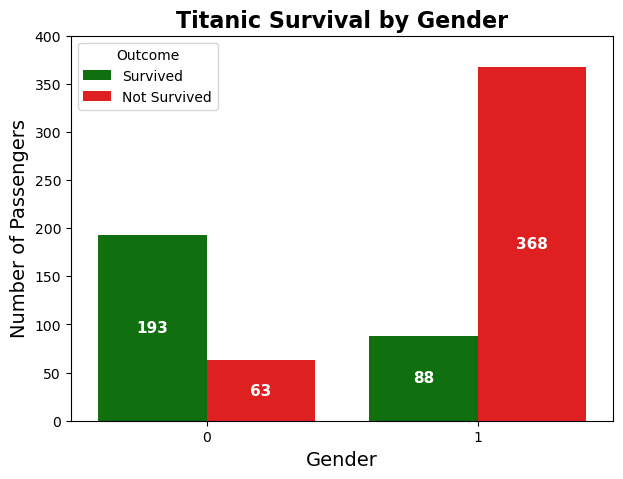

In [414]:
# -------------------------------
# 1. Gender vs. Survival (Barplot)
# -------------------------------

df_train["Sex"] = df_train["Sex"].fillna(df_train["Sex"])
df_train["Survived"] = df_train["Survived"].map({0: "Not Survived", 1: "Survived"})

plt.figure(figsize=(7,5))
ax = sns.countplot(
    data=df_train,
    x="Sex",
    hue="Survived",
    palette={"Survived": "green", "Not Survived": "red"}
)

plt.title("Titanic Survival by Gender", fontsize=16, fontweight="bold")
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of Passengers", fontsize=14)
plt.legend(title="Outcome")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', color="white", fontsize=11, fontweight="bold")

plt.ylim(0, 400)
plt.show()

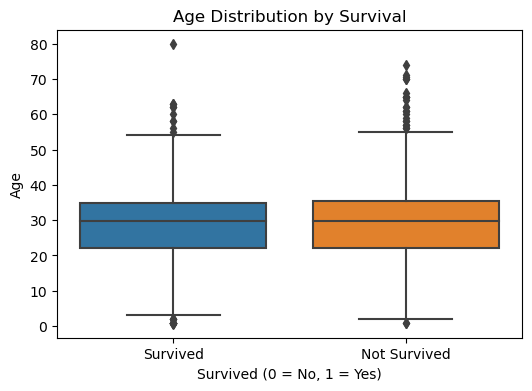

In [415]:
# -------------------------------
# 2. Age Distribution vs. Survival (Boxplot)
# -------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(data=df_train, x="Survived", y="Age")
plt.title("Age Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [416]:
all_dummies = pd.get_dummies( df_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])

In [417]:

def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score (F1): ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))


In [418]:

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
train_dummies_scaled = all_dummies.copy()
train_dummies_scaled[['Age','SibSp','Parch','Fare']] = scale.fit_transform(train_dummies_scaled[['Age','SibSp','Parch','Fare']])

In [419]:
X_train_scaled = train_dummies_scaled
y_train = df_train["Survived"].map({"Survived": 1, "Not Survived": 0}).astype(int)


print("[OK] X_train_scaled shape:", X_train_scaled.shape)
print("[OK] y_train shape:", y_train.shape)
X_train_scaled.head()


[OK] X_train_scaled shape: (712, 7)
[OK] y_train shape: (712,)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,0.672255,0.125,0.0,0.152766,1
1,2,0,0.558805,0.000,0.0,0.026350,0
2,3,1,0.243666,0.000,0.0,0.018543,0
3,3,1,0.445355,0.000,0.0,0.015412,0
4,3,1,0.268877,0.000,0.0,0.015713,0


In [420]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score (F1):', classifier.best_score_)
    print('Best Parameters:', classifier.best_params_)

In [421]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV
clf_knn = GridSearchCV(
    knn,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=5,
    verbose=True,
    n_jobs=-1
)

best_clf_knn = clf_knn.fit(X_train_scaled, y_train)
clf_performance(best_clf_knn, 'KNN')

Fitting 5 folds for each of 120 candidates, totalling 600 fits
KNN
Best Score (F1): 0.734321940312089
Best Parameters: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [422]:

results_df = pd.DataFrame(best_clf_knn.cv_results_)

columns_to_show = [
    'param_n_neighbors',
    'param_weights',
    'param_algorithm',
    'param_p',
    'param_metric',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
]

permutations_df = results_df[columns_to_show].sort_values('rank_test_score')
print("All Permutations and Results:")
print(permutations_df.head(15))

All Permutations and Results:
    param_n_neighbors param_weights param_algorithm param_p param_metric  \
0                   3       uniform       ball_tree       1    euclidean   
62                  3       uniform         kd_tree       2    euclidean   
2                   3       uniform       ball_tree       2    euclidean   
42                  3       uniform       ball_tree       2    minkowski   
60                  3       uniform         kd_tree       1    euclidean   
102                 3       uniform         kd_tree       2    minkowski   
80                  3       uniform         kd_tree       1    manhattan   
40                  3       uniform       ball_tree       1    minkowski   
82                  3       uniform         kd_tree       2    manhattan   
22                  3       uniform       ball_tree       2    manhattan   
20                  3       uniform       ball_tree       1    manhattan   
100                 3       uniform         kd_tree       

In [423]:
cv = cross_val_score(
    knn_best,
    X_train_scaled,
    y_train,
    scoring=make_scorer(f1_score, greater_is_better=True),
    cv=5
)

print("F1 scores from 5 folds:", cv)
print("Mean F1:", cv.mean())

F1 scores from 5 folds: [0.68518519 0.76785714 0.69026549 0.75471698 0.77358491]
Mean F1: 0.734321940312089


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [424]:
all_dummies = pd.get_dummies(df_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])

In [425]:
scale = MinMaxScaler()
train_dummies_scaled = all_dummies.copy()
train_dummies_scaled[['Age','SibSp','Parch','Fare']] = scale.fit_transform(
    train_dummies_scaled[['Age','SibSp','Parch','Fare']]
)

In [426]:
X_train_final = train_dummies_scaled
y_train_final = df_train["Survived"].map({"Survived": 1, "Not Survived": 0}).astype(int)

print("[INFO] Final shapes:", X_train_final.shape, y_train_final.shape)

# 4) Train best model (KNN with best params from CV)
knn_best = KNeighborsClassifier(
    n_neighbors=3,
    algorithm='ball_tree',
    metric='euclidean',
    p=1,
    weights='uniform'
)

knn_best.fit(X_train_final, y_train_final)
print("[INFO] Best KNN model trained successfully!")

[INFO] Final shapes: (712, 7) (712,)
[INFO] Best KNN model trained successfully!


## Part 5 - Apply on test and show model performance estimation

In [427]:
test_dummies = pd.get_dummies(df_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])

test_dummies_scaled = test_dummies.copy()
test_dummies_scaled[['Age','SibSp','Parch','Fare']] = scale.transform(test_dummies_scaled[['Age','SibSp','Parch','Fare']])

X_test_scaled = test_dummies_scaled
y_test = df_test['Survived'].astype(int)

print("[OK] X_test_scaled shape:", X_test_scaled.shape)
print("[OK] y_test shape:", y_test.shape)

[OK] X_test_scaled shape: (179, 7)
[OK] y_test shape: (179,)


Accuracy on Test: 0.8212290502793296
F1 on Test: 0.7333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       118
           1       0.75      0.72      0.73        61

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179


First 5 predictions vs actual:
    True  Predicted
0     0          0
1     0          0
2     0          0
3     0          1
4     1          1


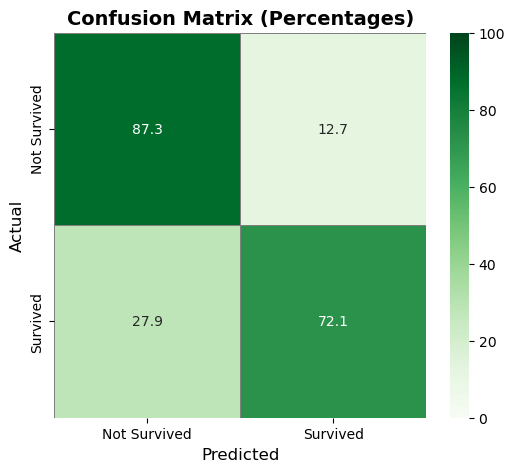

In [428]:
y_pred_test = knn_best.predict(X_test_scaled)


print("Accuracy on Test:", accuracy_score(y_test, y_pred_test))
print("F1 on Test:", f1_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

comparison_df = pd.DataFrame({
    'True': y_test[:5].values,
    'Predicted': y_pred_test[:5]
})
print("\nFirst 5 predictions vs actual:\n", comparison_df)

cm = confusion_matrix(y_test, y_pred_test)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_percent, 
    annot=True, 
    fmt='.1f', 
    cmap='Greens',          
    linewidths=0.5, 
    linecolor='gray',
    xticklabels=['Not Survived','Survived'],
    yticklabels=['Not Survived','Survived'],
    vmin=0, vmax=100 
)

plt.title("Confusion Matrix (Percentages)", fontsize=14, fontweight="bold")
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()